In [1]:
from simply_nwb.pipeline import NWBSession
import matplotlib.pyplot as plt
import os

In [3]:
foldername = "C:\\Users\\minjarec\\OneDrive - The University of Colorado Denver\\Documents\\predict_nwbs"
filename = "predictive-20231103_unitME_session001-nwb-4-24_13-28-6_putative.nwb"
sess = NWBSession(os.path.join(foldername, filename))

In [4]:
# List available enrichments in this dataset
sess.available_enrichments()

['PutativeSaccades', 'PredictSaccades']

In [5]:
# List out the datasets we have available for a given enrichment
sess.available_keys("PredictSaccades")

['saccades_predicted_indices',
 'saccades_predicted_labels',
 'saccades_predicted_nasal_epochs',
 'saccades_predicted_nasal_waveforms',
 'saccades_predicted_temporal_epochs',
 'saccades_predicted_temporal_waveforms',
 'saccades_predicted_waveforms']

In [6]:
# Grab the saccade waveforms
all_waveforms = sess.pull("PredictSaccades.saccades_predicted_waveforms")

In [7]:
# Shape is (saccade num, time, x&y)
all_waveforms.shape

(993, 80, 2)

In [8]:
# So to get all x saccades we can do
xwaves = all_waveforms[:, :, 0]

In [9]:
# Let's grab the predicted directions for these saccades
pred_dirs = sess.pull("PredictSaccades.saccades_predicted_labels")
pred_dirs

array([ 1.,  0.,  1., -1., -1.,  0., -1., -1.,  1.,  1., -1., -1., -1.,
       -1., -1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,
        1.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  1., -1.,  1., -1.,  1.,
       -1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  1., -1., -1.,  1.,
        1., -1., -1.,  0.,  0., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,
       -1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1., -1.,  1., -1.,  0.,  0., -1., -1.,  0.,
       -1.,  0., -1., -1.,  1.,  1.,  1.,  1., -1.,  1., -1., -1., -1.,
        1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1., -1.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,
        1.,  1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1., -1.,  1.,  1.,
        1.,  1.,  1.,  1., -1.,  1., -1.,  0.,  1., -1., -1.,  1.,  1.,
        0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1

In [10]:
# Filter out nasal and temporal (1 is nasal)
nasal_xsaccades = xwaves[pred_dirs == 1]
temporal_xsaccades = xwaves[pred_dirs == -1]
print(f"We have {nasal_xsaccades.shape[0]} nasal saccades")
print(f"We have {temporal_xsaccades.shape[0]} temporal saccades")

We have 628 nasal saccades
We have 251 temporal saccades


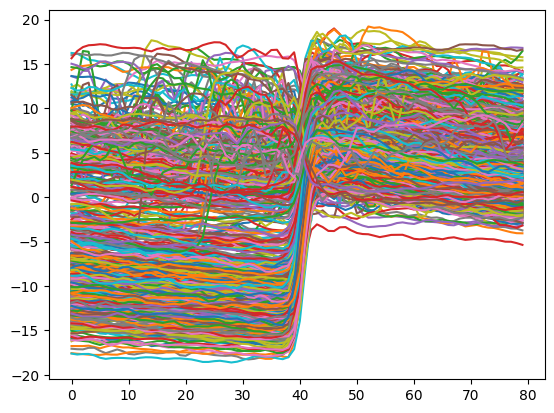

In [11]:
# Lets graph the nasal saccades
fig, ax = plt.subplots()
for saccade in nasal_xsaccades:
    ax.plot(saccade)
